In [ ]:
# Import required libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [ ]:
# Створюємо граф
G = nx.DiGraph()

# Add edges with capcity
edges = [
    ('Terminal 1', 'Warehouse 1', 25),
    ('Terminal 1', 'Warehouse 2', 20),
    ('Terminal 1', 'Warehouse 3', 15),
    ('Terminal 2', 'Warehouse 3', 15),
    ('Terminal 2', 'Warehouse 4', 30),
    ('Terminal 2', 'Warehouse 2', 10),
    ('Warehouse 1', 'Store 1', 15),
    ('Warehouse 1', 'Store 2', 10),
    ('Warehouse 1', 'Store 3', 20),
    ('Warehouse 2', 'Store 4', 15),
    ('Warehouse 2', 'Store 5', 10),
    ('Warehouse 2', 'Store 6', 25),
    ('Warehouse 3', 'Store 7', 20),
    ('Warehouse 3', 'Store 8', 15),
    ('Warehouse 3', 'Store 9', 10),
    ('Warehouse 4', 'Store 10', 20),
    ('Warehouse 4', 'Store 11', 10),
    ('Warehouse 4', 'Store 12', 15),
    ('Warehouse 4', 'Store 13', 5),
    ('Warehouse 4', 'Store 14', 10),
]

# Додаємо всі ребра до графа
G.add_weighted_edges_from(edges)

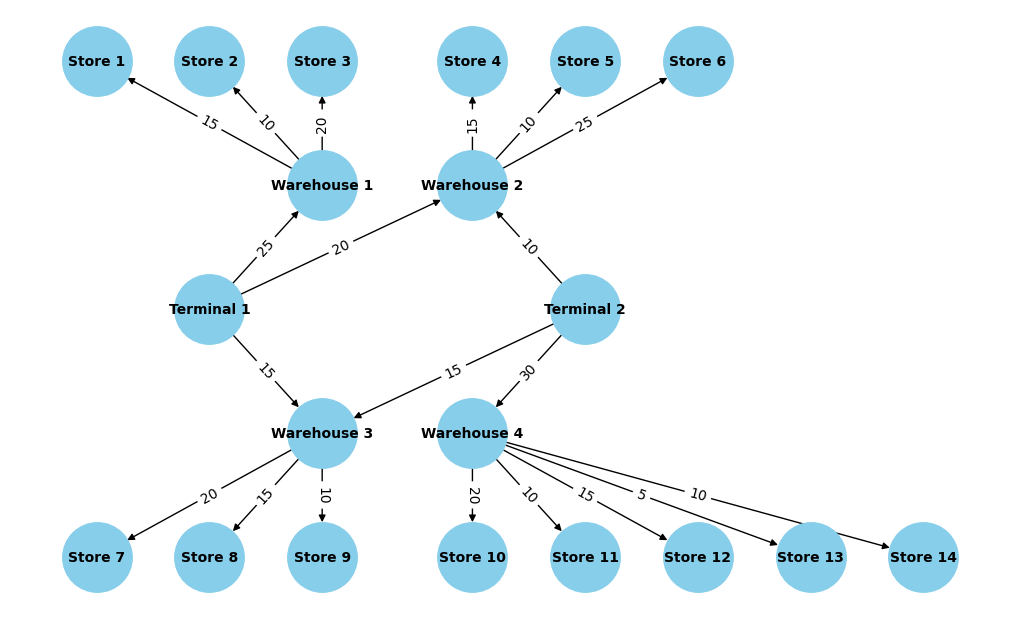

In [ ]:
pos = {
    'Terminal 1': (0, 0),
    'Terminal 2': (5, 0),
    'Warehouse 1': (1.5, 2),
    'Warehouse 2': (3.5, 2),
    'Warehouse 3': (1.5, -2),
    'Warehouse 4': (3.5, -2),
    'Store 1': (-1.5, 4),
    'Store 2': (0, 4),
    'Store 3': (1.5, 4),
    'Store 4': (3.5, 4),
    'Store 5': (5, 4),
    'Store 6': (6.5, 4),
    'Store 7': (-1.5, -4),
    'Store 8': (0, -4),
    'Store 9': (1.5, -4),
    'Store 10': (3.5, -4),
    'Store 11': (5, -4),
    'Store 12': (6.5, -4),
    'Store 13': (8, -4),
    'Store 14': (9.5, -4),
}

# Малюємо граф
plt.figure(figsize=(10, 6))
nx.draw(G, pos=pos, with_labels=True, node_size=2500, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)

# Відображаємо граф
plt.show()

In [ ]:
# Function for finding an increasing path (BFS)
def bfs(capacity_matrix, flow_matrix, source, sink, parent):
    visited = [False] * len(capacity_matrix)
    queue = deque([source])
    visited[source] = True

    while queue:
        current_node = queue.popleft()

        for neighbor in range(len(capacity_matrix)):
            # Check if there is remaining capacity
            if not visited[neighbor] and capacity_matrix[current_node][neighbor] - flow_matrix[current_node][neighbor] > 0:
                parent[neighbor] = current_node
                visited[neighbor] = True
                if neighbor == sink:
                    return True
                queue.append(neighbor)

    return False

In [ ]:
# Basic function for calculating maximum flow
def edmonds_karp(capacity_matrix, source, sink):
    num_nodes = len(capacity_matrix)
    flow_matrix = [[0] * num_nodes for _ in range(num_nodes)]  # Initialize the flow matrix to zero
    parent = [-1] * num_nodes
    max_flow = 0

    # While there is an increasing path, add a flow
    while bfs(capacity_matrix, flow_matrix, source, sink, parent):
        # Find the minimum throughput along the found path (bottleneck)
        path_flow = float('Inf')
        current_node = sink

        while current_node != source:
            previous_node = parent[current_node]
            path_flow = min(path_flow, capacity_matrix[previous_node][current_node] - flow_matrix[previous_node][current_node])
            current_node = previous_node

        # Update the flow along the path, taking into account the return flow
        current_node = sink
        while current_node != source:
            previous_node = parent[current_node]
            flow_matrix[previous_node][current_node] += path_flow
            flow_matrix[current_node][previous_node] -= path_flow
            current_node = previous_node

        # Increase the maximum flow
        max_flow += path_flow

    return max_flow

In [ ]:
# Capacity_matrix
capacity_matrix = [
   # T1 W1 W2 W3 T2 W4 S1 S2 S3 S4 S5 S6 S7 S8 S9 S10 S11 S12 S13 S14
    [0, 25, 20, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],   # Terminal 1
    [0, 0, 0, 0, 0, 0, 15, 10, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],   # Warehouse 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 10, 25, 0, 0, 0, 0, 0, 0, 0, 0],   # Warehouse 2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 15, 10, 0, 0, 0, 0, 0],   # Warehouse 3
    [0, 0, 10, 15, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],   # Terminal 2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 10, 15, 5, 10],  # Warehouse 4
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 3
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 4
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 5
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 6
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 8
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 9
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 12
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 13
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],      # Store 14
]



In [ ]:
terminals = [0, 4]
stores = list(range(6, 20))
max_flow_list = []

for terminal in terminals:
    for store in stores:
        max_flow_dict = {}
        max_flow_dict['Terminal'] = list(G.nodes)[terminal]
        max_flow_dict['Store'] = list(G.nodes)[store]
        max_flow_dict['Max Flow'] = edmonds_karp(capacity_matrix, terminal, store)
        max_flow_list.append(max_flow_dict)

df = pd.DataFrame(max_flow_list)
df

,Terminal,Store,Max Flow
0,Terminal 1,Store 1,15
1,Terminal 1,Store 2,10
2,Terminal 1,Store 3,20
3,Terminal 1,Store 4,15
4,Terminal 1,Store 5,10
5,Terminal 1,Store 6,20
6,Terminal 1,Store 7,15
7,Terminal 1,Store 8,15
8,Terminal 1,Store 9,10
9,Terminal 1,Store 10,0


1. Which terminals provide the largest flow of goods to stores?

In [ ]:
df.groupby('Terminal').sum('Max Flow')

,Max Flow
Terminal,
Terminal 1,130
Terminal 2,130


Both terminals provide the same maximum flow (130 units each).

2. Which routes have the lowest capacity and how does this affect overall flow?


In [ ]:
df[df['Max Flow'] > 0].sort_values('Max Flow')

,Terminal,Store,Max Flow
26,Terminal 2,Store 13,5
1,Terminal 1,Store 2,10
17,Terminal 2,Store 4,10
4,Terminal 1,Store 5,10
19,Terminal 2,Store 6,10
18,Terminal 2,Store 5,10
8,Terminal 1,Store 9,10
22,Terminal 2,Store 9,10
24,Terminal 2,Store 11,10
27,Terminal 2,Store 14,10


The route Terminal 2 → Warehouse 4 → Store 13 has the lowest capacity (5 units). This limits the total network capacity.

3. Which stores received the least goods and can their supply be increased by increasing the capacity of certain routes?

In [ ]:
df.groupby('Store').sum('Max Flow').sort_values('Max Flow')

,Max Flow
Store,
Store 13,5
Store 11,10
Store 14,10
Store 2,10
Store 1,15
Store 12,15
Store 10,20
Store 3,20
Store 5,20


Store 13 only received 5 units. We can increase the supply by increasing the capacity of the Warehouse 4 → Store 13 edge.

4. Are there bottlenecks that can be eliminated to improve the efficiency of the logistics network?

The main bottlenecks are:

- Warehouse 4 → Store 13 (5 units)
- Terminal 2 → Warehouse 2 (10 units)
- Warehouse 1 → Store 2 (10 units)